In [2]:
import voteestimator
import matplotlib.pyplot as plt
import importlib; importlib.reload(voteestimator)

<module 'voteestimator' from 'C:\\Users\\Gebruiker\\Documents\\Willekeurige berekeningen\\Top2000\\src\\voteestimator.py'>

In [3]:
meindertsmavotes = voteestimator.MeindertsmaVotesEstimator()
exponentialvotes = voteestimator.ExponentialVotesEstimator()
linearvotes = voteestimator.LinearVotesEstimator()

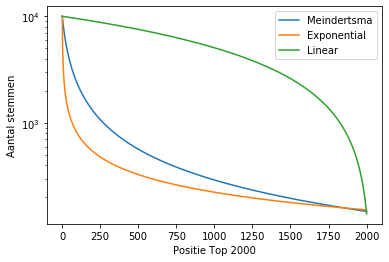

In [7]:
positions = range(1, 2001)
vote_estimators = {'Meindertsma': meindertsmavotes,
                    'Exponential': exponentialvotes,
                   'Linear': linearvotes,
                  }
for name, estimator in vote_estimators.items():
    votes = [estimator.votes_per_position(i) for i in positions]
    plt.semilogy(positions, votes, label=name)
    plt.legend()

ax = plt.gca()
ax.set_ylabel('Aantal stemmen')
ax.set_xlabel('Positie Top 2000')
plt.savefig('Stemverdelingen.png')

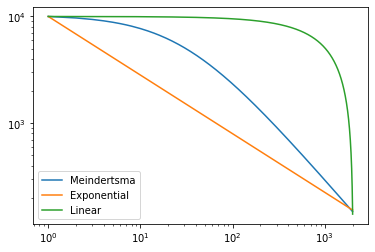

In [22]:
for name, estimator in vote_estimators.items():
    votes = [estimator.votes_per_position(i) for i in positions]
    plt.loglog(positions, votes, label=name)
    plt.legend()

ax = plt.gca()
ax.set_xlabel('Position')

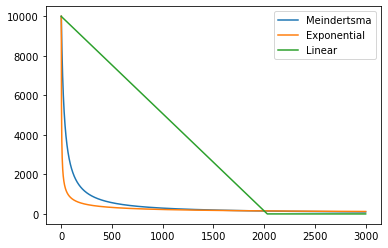

In [27]:
for name, estimator in vote_estimators.items():
    long_range = range(1, 3000)
    votes = [estimator.votes_per_position(i) for i in long_range]
    plt.plot(long_range, votes, label=name)
plt.legend()

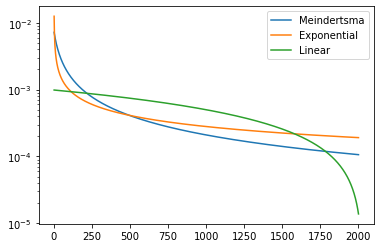

In [23]:
for name, estimator in vote_estimators.items():
    votes = [estimator.percentage_of_votes(i) for i in positions]
    plt.semilogy(positions, votes, label=name)
    plt.legend()

In [24]:
print(f'The total number of votes in 2006 was 1.5 M votes. This is estimated as {round(meindertsmavotes.total_votes)} by the Meindertsma model')
print(f'and as {round(exponentialvotes.total_votes)} by the Exponential model')

The total number of votes in 2006 was 1.5 M votes. This is estimated as 1389415 by the Meindertsma model
and as 798779 by the Exponential model


In [25]:
for name, estimator in vote_estimators.items():
    print(name, estimator.votes_per_position(3000))

Meindertsma 99.04258831297457
Exponential 122.34417871079151
Linear 0


In [6]:
print(f'The number of votes at place 3000 is : {round(meindertsmavotes.votes_per_position(3000))} for the Meindertsma model and {round(exponentialvotes.votes_per_position(3000))} for the exponential model')

The number of votes at place 3000 is : 99 for the Meindertsma model and 122 for the exponential model


Note that LogarithmicEstimator produces too small values for the total number of voted songs; but Meindertsma still estimates 100 votes for the least voted song, which is not perfect either.

In [30]:
generalize = voteestimator.GeneralizedVotesEstimator(rho)

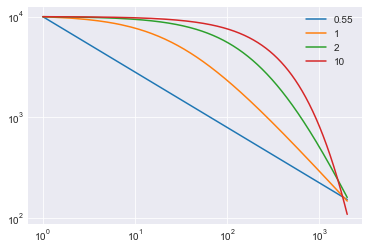

In [16]:
positions = range(1, 2001)
vote_estimators = {'Meindertsma': meindertsmavotes,
                    'Exponential': exponentialvotes,
                   'Linear': linearvotes,
                  }

params_lst = ({'rho': 0.55, 'diff_factor': 1},
              {'rho': 1, 'diff_factor': 30}, 
              {'rho': 2, 'diff_factor': 290},
              {'rho': 10, 'diff_factor': 3500},
             )

vote_estimators_gen = {params['rho']: voteestimator.GeneralizedVotesEstimator(**params) for params in params_lst}
fig, ax = plt.subplots()

for name, estimator in vote_estimators_gen.items():
    votes = [estimator.votes_per_position(i) for i in positions]
    ax.loglog(positions, votes, label=name)
    
# for name, estimator in vote_estimators.items():
#     votes = [estimator.votes_per_position(i) for i in positions]
#     ax.loglog(positions, votes, label=name)
    
plt.legend()
plt.show()

In [66]:
import numpy as np
1999 / ((np.log(10000/150) / np.log(0.55)) - 1)

-249.10175771722936

In [75]:
def calc_diff_factor(rho):
    return 1999/ (((10000/150) ** (1/rho)) - 1)

In [76]:
calc_diff_factor(0.55)

0.9656613029825667

In [77]:
calc_diff_factor(1)

30.44162436548223

In [78]:
calc_diff_factor(2)

278.99644648850625

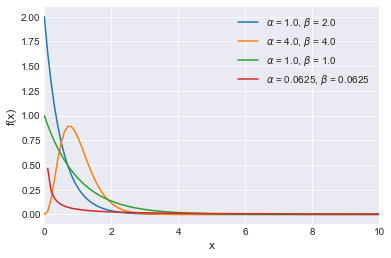

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
plt.style.use('seaborn-darkgrid')
x = np.linspace(0, 20, 200)
alphas = [1., 2., 3., 7.5]
betas = [.5, .5, 1., 1.]

mus = [0.5, 1, 1, 1]
sigmas = [0.5, 0.5, 1, 4]

def reparametrize_gamma_dist(mu, sigma):
    alpha = mu**2 / sigma**2
    beta = mu / sigma**2
    return (alpha, beta)

paramslist = [reparametrize_gamma_dist(mu, sigma) for mu, sigma in zip(mus, sigmas)]

for params in paramslist:
    a, b = params[0], params[1]
    pdf = st.gamma.pdf(x, a, scale=1.0/b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.xlim(0, 10)
plt.legend(loc=1)
plt.show()

$\mu$: 0.0, $\sigma$: 0.25, mean: 1.0317434074991028, mode= 0.9394130628134758, median=1.0
$\mu$: 0.0, $\sigma$: 0.5, mean: 1.1331484530668263, mode= 0.7788007830714049, median=1.0
$\mu$: 0.0, $\sigma$: 1.0, mean: 1.6487212707001282, mode= 0.36787944117144233, median=1.0
$\mu$: 0.7, $\sigma$: 1, mean: 3.3201169227365472, mode= 0.7408182206817179, median=2.0137527074704766


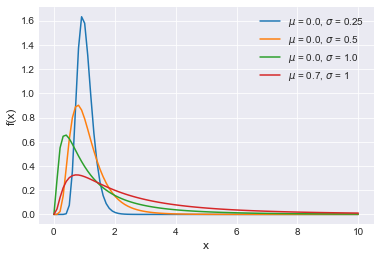

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
plt.style.use('seaborn-darkgrid')
x = np.linspace(0, 10, 100)
mus = [0., 0., 0., 0.7, 0, ]
sigmas = [.25, .5, 1., 1, ]
for mu, sigma in zip(mus, sigmas):
    print(f'$\mu$: {mu}, $\sigma$: {sigma}, mean: {np.exp(mu + sigma**2/2)}, mode= {np.exp(mu - sigma**2)}, median={np.exp(mu)}')
    pdf = st.lognorm.pdf(x, sigma, scale=np.exp(mu))
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

In [33]:
np.log(1)

0.0

In [31]:
pdf[-10:]

array([0.01409194, 0.01370604, 0.01333316, 0.01297277, 0.01262436,
       0.01228747, 0.01196164, 0.01164643, 0.01134144, 0.01104626])

In [28]:
np.exp(0.5)

1.6487212707001282